## NumPyで回帰分析(線形回帰)する

機械学習を学ぶ中で一番基礎的な線形回帰をやってみるよ

### 線形回帰
- 独立変数$X$とそれに従属する変数(従属変数)$y$との関係を求める。
- その関係を示したモデルを「線形回帰モデル」と呼ぶ。

$X$に$p$個の因子が含まれてて、$i$番目における従属変数$y_i$を、関数$g$, 係数$\omega$を使って、
$$\omega _0 + \sum _{k = 1}^{K} \omega _k g_k(X_i1, X_i2, …, X_ip)$$

の多項式で予想する。

(実際はノイズ項を導入するが、簡略化のため省略)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

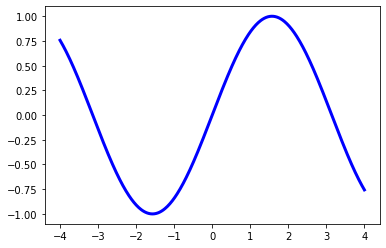

In [8]:
# -4 ~ 4, 項数500の等差数列
theta = np.linspace(-4, 4, 500)

# -4 ~ 4 のsin
sin = np.sin(x)

# グラフ描画
plt.plot(theta, sin, 'b', linewidth = 3)
plt.show()

こいつを、
$$f(X_i) = \omega _0 + \sum _{k = 1}^{5} \omega_k X_{i}^{k}$$

をモデルとして学習させていく。

### 損失関数の設定

この予測モデルがどれほど目標と離れているのかを示す関数。出力値が大きければ目標との差が大きいということ。

ここでは、二乗和誤差$L$を考える。
$$L = \frac{1}{2} \sum _{n = 1}^{N} (y_n - f(X_n))^2$$

$L$が最小になる$\omega$を探索することができれば、学習モデルが完成する。

つまり、$$\frac{\partial L}{\partial \omega _i}=0$$となる$\omega$を探せばよい。

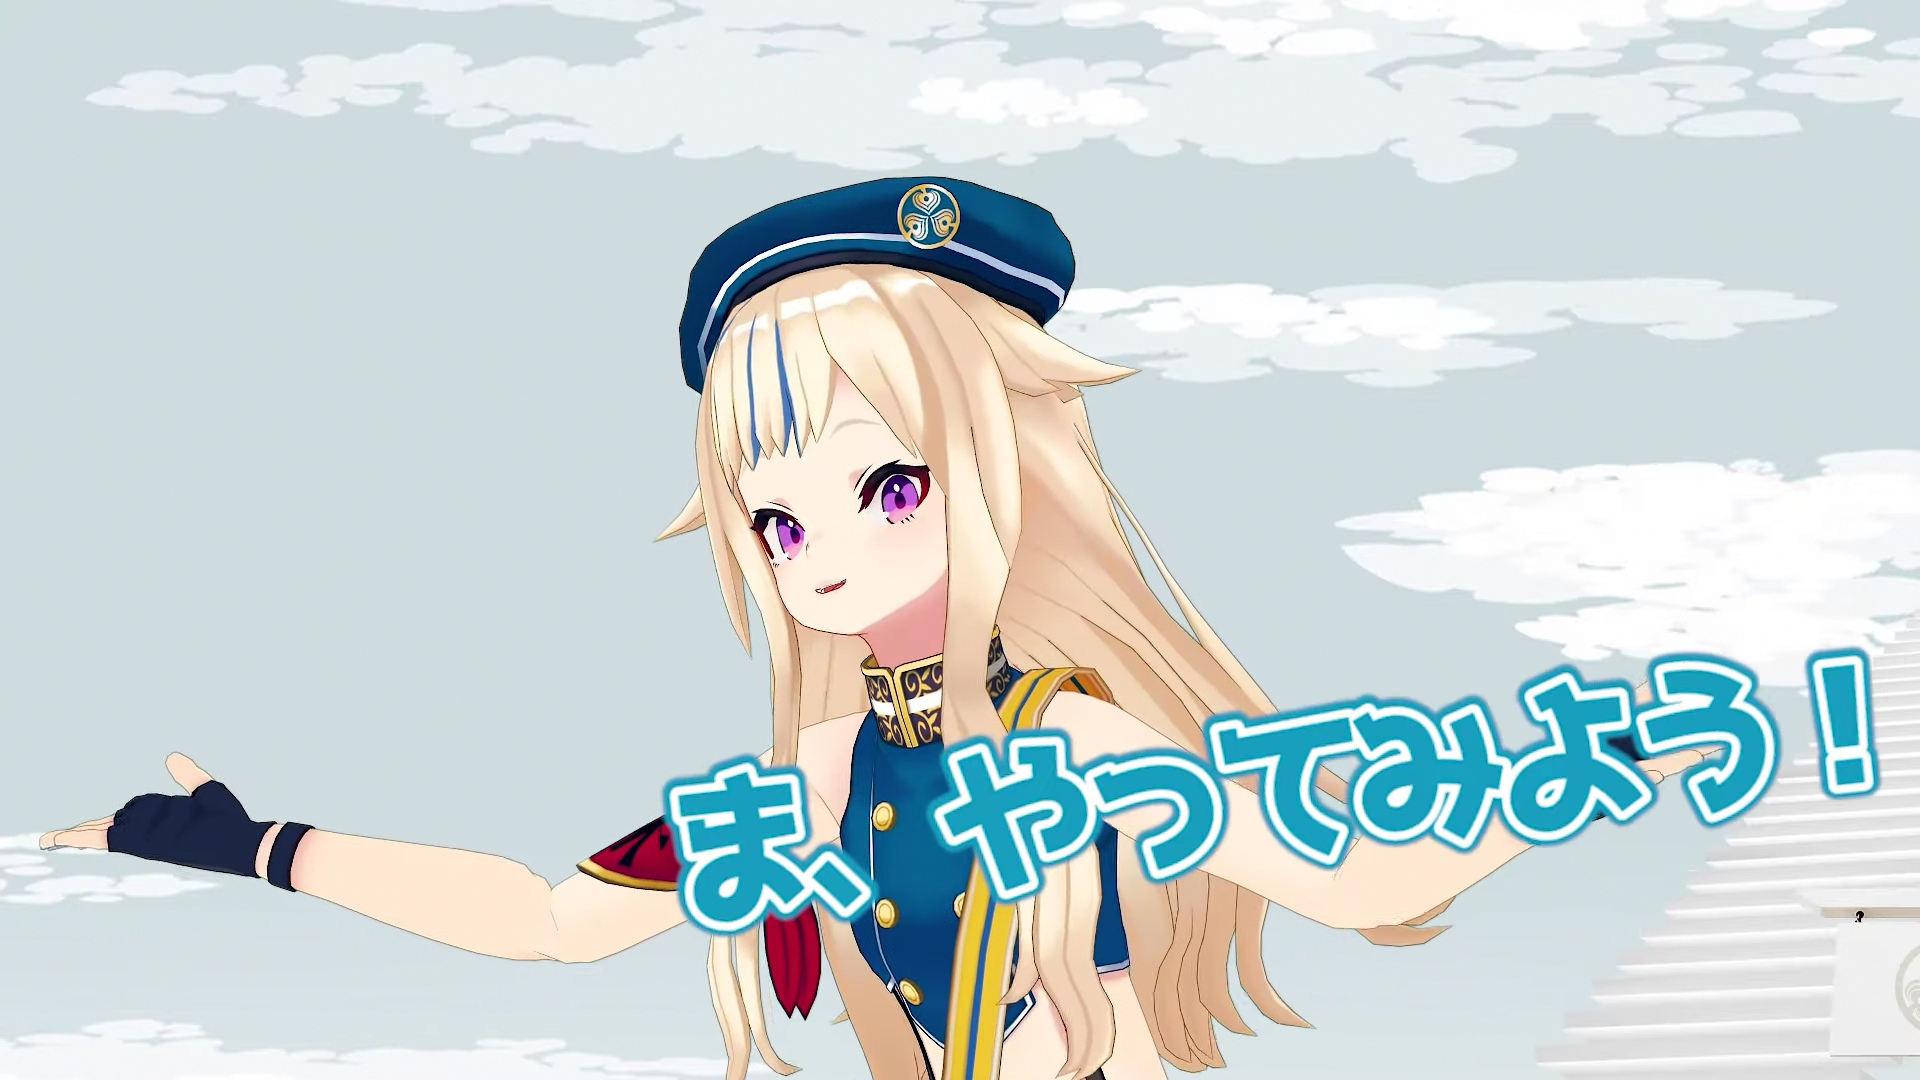

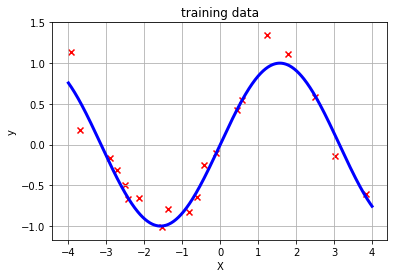

In [41]:
# 0 ~ 1 の一様乱数20個
X = np.random.rand(20)

# 0 ~ 8 の一様乱数20個
X = X * 8

# -4 ~ 4 の一様乱数20個
X = X - 4


# sinカーブにノイズを加えた
y = np.sin(X) + np.random.randn(20) * 0.2


plt.xlabel('X')
plt.ylabel('y')
plt.title('training data')

# グリッド線を引く
plt.grid()

plt.plot(theta, sin, 'b', linewidth = 3)
plt.scatter(X, y, marker = 'x', c = 'red')

plt.show()

In [42]:
# 行列A_ij = Σ_{n = 1}^{N} x_{n}^{i + j}

# 6 × 6 の0行列
A = np.empty((6, 6))

for i in range(6):
    for j in range(6):
        A[i][j] = np.sum(X**(i + j))

In [43]:
# ベクトルb = Σ y_n X_n^i

b = np.empty(6)

for i in range(6):
    b[i] = np.sum(y * (X ** i))

In [44]:
# これらはベクトルω を使って、Aω = b と書けるので、 ω = A^-1 b を計算する
Ainv = np.linalg.inv(A)

print(b, end = "\n\n")
b = b.reshape(-1, 1)
print(b)

omega = np.dot(Ainv, b.reshape(-1, 1))

[-1.36147821e+00  7.20759340e+00  6.07715175e-01 -5.76897259e+01
  1.03082559e+02 -1.43075385e+03]

[[-1.36147821e+00]
 [ 7.20759340e+00]
 [ 6.07715175e-01]
 [-5.76897259e+01]
 [ 1.03082559e+02]
 [-1.43075385e+03]]


In [45]:
# flattenで1次元に平坦化し、np.poly1d でこれを係数とした多項式を作る
f = np.poly1d(omega.flatten() [::-1])
print(f)

          5            4          3           2
0.005252 x + 0.001176 x - 0.1594 x - 0.02074 x + 1.022 x + 0.09336


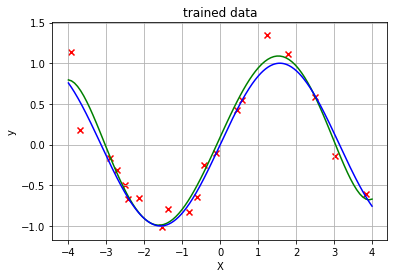

In [46]:
XX = np.linspace(-4, 4, 100)
plt.xlabel('X')
plt.ylabel('y')
plt.title('trained data')
plt.grid()

plt.plot(XX, f(XX), 'g')
plt.plot(theta, sin, 'b')
plt.scatter(X, y, marker = 'x', c = 'red')

plt.show()

かなりうまくフィットさせられた！

…という以上の作業を一発でやってくれる関数を見てみよう

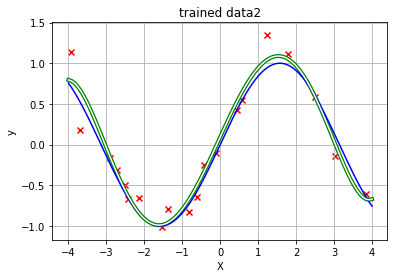

In [54]:
# 線形回帰する関数
omega_2 = np.polyfit(X, y, 5)

f_2 = np.poly1d(omega_2)

XX = np.linspace(-4, 4, 100)
plt.xlabel('X')
plt.ylabel('y')
plt.title('trained data2')
plt.grid()

plt.plot(XX, f(XX), 'g', linewidth = 4)
plt.plot(theta, sin, 'b')
plt.plot(XX, f_2(XX), 'w')
plt.scatter(X, y, marker = 'x', c = 'red')

plt.show()

実際は、過学習が起こらないように、損失関数に罰則項を付け加えることもある。